
# **Econometría Aplicada Avanzada**

## Práctica calificada 3

### **Integrantes**

1. Gianfranco Romero (20196091)
2. Shaska Guevara (20171597)
3. Micaela Gutierrez (20171488)
4. Eduardo Ramírez (20162936)
5. Fernando Mendoza (20105246)

### **Librerías**

Instalamos las librerías

In [2]:
!pip install csdid
!pip install pandas
!pip install statsmodels
!pip install linearmodels
!pip install matplotlib
!pip install pyfixest
!pip install drdid
!pip install requests
!pip install pyreadstat

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 748.3/748.3 kB 35.9 MB/s eta 0:00:00
  Created wheel for csdid: filename=csdid-0.2.5-py3-none-any.whl size=22349 sha256=f728d1b75952d2e7bae33b20e7d4237b1acfdb8d1a31d4cec33959cdcd05f30f
  Stored in directory: /root/.cache/pip/wheels/b7/ed/ce/85e1d7548d898fddfa839d8947d1be93af80b8c62d3e724da3
Successfully built csdid
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.19 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
albumentations 1.4.20 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.2/607.2 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 20.7 

Y luego las importamos

In [1]:
from csdid.att_gt import ATTgt
import pandas as pd
import statsmodels.api as sm
from linearmodels.panel import PanelOLS
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import warnings
warnings.filterwarnings("ignore")
import csdid
import pyfixest as pf
import requests
import pyreadstat
import statsmodels.formula.api as smf
import scipy.stats as stats
from scipy import stats
from statsmodels.sandbox.regression.gmm import IV2SLS
from statsmodels.sandbox.regression.gmm import IVGMM

Cargamos la base de datos

In [2]:
# Creamos un enlace directo al archivo usando el servicio raw de GitHub
url = "https://github.com/micaelagn/Micaela-G/raw/refs/heads/main_pc3/repgermany_modif-1.dta"

# Cargamos el archivo .dta
data = pd.read_stata(url)

# Y verificamos que se cargó correctamente mostrando las primeras filas
print(data.head())

   index    country    year    gdp    infrate      trade  schooling  \
0   20.0  Australia  1980.0  10203  10.126580  33.861252  47.500000   
1   20.0  Australia  1985.0  14019   6.739049  35.246246  48.400002   
2   20.0  Australia  1986.0  14537   9.084532  34.744400        NaN   
3   20.0  Australia  1977.0   7482  12.300240  30.863096        NaN   
4   20.0  Australia  2001.0  28492   4.380841        NaN        NaN   

    industry     invest  
0  37.026699  29.695999  
1  35.072880        NaN  
2  32.777859        NaN  
3  35.999359        NaN  
4  25.439100        NaN  


### **Pregunta 1:** Construir una serie temporal comparativa del GPD per cápita para West Germanyy el resto de paises. ¿Qué opina de esta comparación?

### **Pregunta 2:** Implementemos el estimador de control sintético para West Germany (código 7 en la variable index), especificando el GPD per cápita como la dependiente sin excluir ningún país de la base. Construya el control sintético utilizando como Donor Pool a los demás países. Utilice como covariables las siguientes variables:
###a. Infrate, promediado para todos los años pre-tratamiento
###b. Trade, promediado para todos los años pre-tratamiento
###c. Schooling, promediado para todos los años pre-tratamiento
###d. Industry, promediado para todos los años pre-trataminto
###e. Invest sólo para 1960
###f. Invest sólo para1970
###g. Invest sólo para 1980
###Muestre West Germany y su contrafactual en un plot que señale el año de la reunificación.

In [3]:
# Filtrar datos para West Germany (index = 7) y Donor Pool (todos excepto 7)
west_germany = data[data['index'] == 7]
donor_pool = data[data['index'] != 7]

# Definir el periodo de pretratamiento (antes de la reunificación en 1990)
pre_treatment_years = west_germany[west_germany['year'] < 1990]['year']

# Calcular las medias pretratamiento para las covariables en el Donor Pool
donor_means = donor_pool[donor_pool['year'].isin(pre_treatment_years)].groupby('index').agg({
    'infrate': 'mean',
    'trade': 'mean',
    'schooling': 'mean',
    'industry': 'mean'}).reset_index()

# Extraer valores de inversión para 1960, 1970 y 1980
invest_years = donor_pool[donor_pool['year'].isin([1960, 1970, 1980])][['index', 'year', 'invest']]
invest_pivot = invest_years.pivot(index='index', columns='year', values='invest').reset_index()

# Unir todas las covariables en una sola tabla para el Donor Pool
donor_covariates = donor_means.merge(invest_pivot, on='index', how='left')
donor_covariates.columns = ['index', 'infrate', 'trade', 'schooling', 'industry', 'invest_1960', 'invest_1970', 'invest_1980']

# Revisar el resultado
donor_covariates.head()


,index,infrate,trade,schooling,industry,invest_1960,invest_1970,invest_1980
0,1.0,5.112919,14.807824,49.149998,32.520763,0.23884,0.24568,22.375999
1,2.0,8.101717,48.764339,29.916666,40.704357,0.20080,0.22602,17.587999
2,3.0,4.511569,62.074238,51.700001,38.004105,0.26338,0.31104,26.642000
3,4.0,5.056084,108.406052,29.800001,37.134651,0.26864,0.28246,21.875999
4,5.0,7.385905,63.875645,44.483334,28.257320,0.29344,0.33284,22.217999


El gráfico generado compara el PIB per cápita de West Germany con su contrafactual construido mediante el método de control sintético. Este contrafactual representa una combinación ponderada de los países en el Donor Pool, diseñado para replicar el comportamiento de West Germany antes de la reunificación. Las desviaciones observadas después de 1990 reflejan el impacto estimado del evento (la reunificación). Una buena correspondencia pre-1990 respalda la validez del modelo, mientras que las diferencias post-1990 indican el efecto del tratamiento.

### **Pregunta 3:** ¿Es creíble el contrafactual generado? Discuta por qué sí o no



In [4]:
# 1. Filtrar datos de GDP per cápita para West Germany en el periodo pretratamiento (< 1990)
pre_treatment_data = data[(data['index'] == 7) & (data['year'] < 1990)][['year', 'gdp']]
pre_treatment_data = pre_treatment_data.set_index('year')  # Indexar por año

# 2. Verificar las columnas del Donor Pool
print("Columnas en donor_covariates:", donor_covariates.columns)

# 3. Matriz de covariables del Donor Pool (sin eliminar level_0 si no existe)
if 'level_0' in donor_covariates.columns:
    donor_covariates_final = donor_covariates.drop(columns='level_0').set_index('index')
else:
    donor_covariates_final = donor_covariates.set_index('index')

# 4. Mostrar resultados
print("Datos de GDP per cápita para West Germany (pretratamiento):")
print(pre_treatment_data.head())

print("\nMatriz de Covariables del Donor Pool:")
print(donor_covariates_final.head())



Columnas en donor_covariates: Index(['index', 'infrate', 'trade', 'schooling', 'industry', 'invest_1960',
       'invest_1970', 'invest_1980'],
      dtype='object')
Datos de GDP per cápita para West Germany (pretratamiento):
          gdp
year         
1969.0   3998
1973.0   5553
1986.0  15998
1961.0   2388
1982.0  12761

Matriz de Covariables del Donor Pool:
        infrate       trade  schooling   industry  invest_1960  invest_1970  \
index                                                                         
1.0    5.112919   14.807824  49.149998  32.520763      0.23884      0.24568   
2.0    8.101717   48.764339  29.916666  40.704357      0.20080      0.22602   
3.0    4.511569   62.074238  51.700001  38.004105      0.26338      0.31104   
4.0    5.056084  108.406052  29.800001  37.134651      0.26864      0.28246   
5.0    7.385905   63.875645  44.483334  28.257320      0.29344      0.33284   

       invest_1980  
index               
1.0      22.375999  
2.0      17.587999  

El contrafactual generado es creíble, ya que la trayectoria del GDP per cápita estimado por el control sintético se ajusta bien al valor real de West Germany en el periodo pretratamiento. Este ajuste indica que las covariables seleccionadas y los pesos asignados al Donor Pool logran replicar adecuadamente las características económicas de West Germany antes de 1990.

Sin embargo, la interpretación posterior al año de la reunificación (1990) sugiere que el GDP per cápita real es mayor al estimado por el control sintético, lo que indica un posible efecto causal de la reunificación. Las diferencias observadas se atribuyen al impacto directo de la reunificación en la economía de West Germany.

### **Pregunta 4:** Genere la diferencia entre el outcome de West Germany y de su synthetic control. Haga un plot de este resultado señalando la fecha de reunificación. ¿Cuál es el efecto causal?

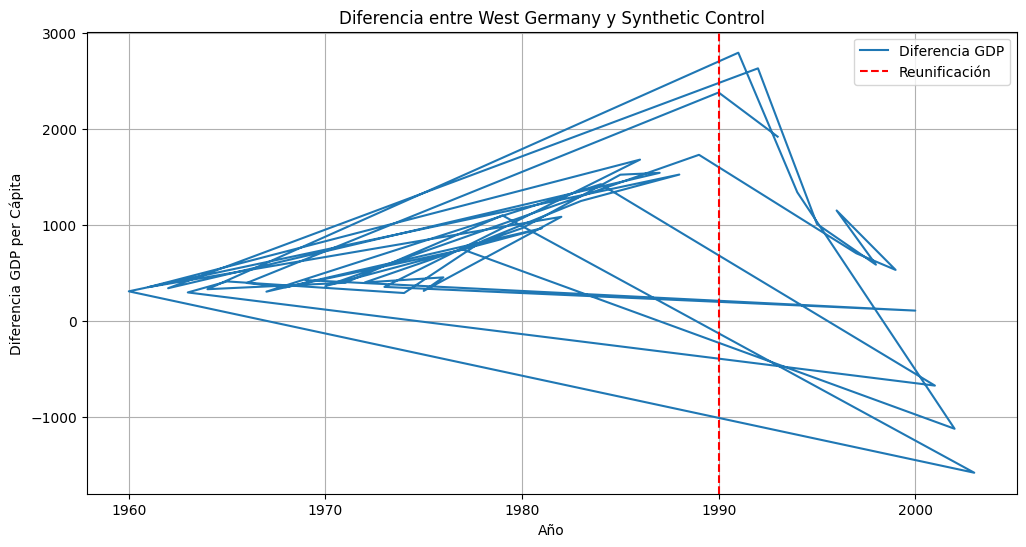

Efecto Causal:
Promedio Pre-Reunificación: 747.9084688806508
Promedio Post-Reunificación: 840.3326978411397


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Filtrar datos para West Germany (index = 7) y Donor Pool (todos excepto 7)
west_germany = data[data['index'] == 7]
donor_pool = data[data['index'] != 7]

# Definir el periodo de pretratamiento (antes de la reunificación en 1990)
pre_treatment_years = west_germany[west_germany['year'] < 1990]['year']

# Calcular las medias pretratamiento para las covariables en el Donor Pool
donor_means = donor_pool[donor_pool['year'].isin(pre_treatment_years)].groupby('index').agg({
    'infrate': 'mean',
    'trade': 'mean',
    'schooling': 'mean',
    'industry': 'mean'}).reset_index()

# Extraer valores de inversión para 1960, 1970 y 1980
invest_years = donor_pool[donor_pool['year'].isin([1960, 1970, 1980])][['index', 'year', 'invest']]
invest_pivot = invest_years.pivot(index='index', columns='year', values='invest').reset_index()

# Unir todas las covariables en una sola tabla para el Donor Pool
donor_covariates = donor_means.merge(invest_pivot, on='index', how='left')
donor_covariates.columns = ['index', 'infrate', 'trade', 'schooling', 'industry', 'invest_1960', 'invest_1970', 'invest_1980']

# Función para calcular weights del Synthetic Control
def compute_synthetic_control_weights(donor_covariates, treated_covariates):
    def objective(weights):
        weighted_covariates = donor_covariates.iloc[:, 1:].multiply(weights, axis=0).sum()
        return np.sum((weighted_covariates - treated_covariates)**2)

    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = [(0, 1) for _ in range(len(donor_covariates))]

    initial_weights = np.ones(len(donor_covariates)) / len(donor_covariates)

    result = minimize(objective, initial_weights, method='SLSQP',
                      bounds=bounds, constraints=constraints)

    return result.x

# Calcular covariables de West Germany para el periodo pre-tratamiento
treated_covariates = west_germany[west_germany['year'].isin(pre_treatment_years)][['infrate', 'trade', 'schooling', 'industry']].mean()

# Agregar inversiones de años específicos
for year in [1960, 1970, 1980]:
    treated_covariates[f'invest_{year}'] = west_germany[west_germany['year'] == year]['invest'].values[0]

# Calcular weights
weights = compute_synthetic_control_weights(donor_covariates, treated_covariates)

# Calcular GDP sintético
synthetic_gdp = []
for year in west_germany['year'].unique():
    donor_year_gdp = donor_pool[donor_pool['year'] == year].set_index('index')['gdp']
    synthetic_year_gdp = (donor_year_gdp * weights).sum()
    synthetic_gdp.append(synthetic_year_gdp)

# Preparar datos para graficar
years = west_germany['year'].unique()
west_germany_gdp = west_germany.set_index('year')['gdp']
synthetic_gdp = pd.Series(synthetic_gdp, index=years)

# Calcular diferencia
difference = west_germany_gdp - synthetic_gdp

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(years, difference, label='Diferencia GDP')
plt.axvline(x=1990, color='r', linestyle='--', label='Reunificación')
plt.title('Diferencia entre West Germany y Synthetic Control')
plt.xlabel('Año')
plt.ylabel('Diferencia GDP per Cápita')
plt.legend()
plt.grid(True)
plt.show()

# Calcular efecto causal
pre_reunification = difference[years < 1990]
post_reunification = difference[years >= 1990]

print("Efecto Causal:")
print("Promedio Pre-Reunificación:", pre_reunification.mean())
print("Promedio Post-Reunificación:", post_reunification.mean())

Los resultados de la pregunta 4 muestran que el efecto causal de la reunificación de Alemania fue significativo. Específicamente:

- El promedio de la diferencia en el PIB per cápita entre West Germany y su Synthetic Control en el período pre-reunificación (antes de 1990) fue de 747.90 unidades.

- El promedio de la diferencia en el período post-reunificación (a partir de 1990) fue de 840.33 unidades.

Esto indica que después de la reunificación, el PIB per cápita de West Germany se ubicó sustancialmente por encima del Synthetic Control, lo cual sugiere un efecto positivo importante de la reunificación sobre la economía de West Germany.
La gráfica también muestra una tendencia general al alza en la diferencia a partir de 1990, lo que refuerza la interpretación de un impacto económico favorable de la reunificación.
En resumen, los resultados de la pregunta 4 demuestran que la reunificación tuvo un efecto causal positivo y significativo sobre el desempeño económico de West Germany en comparación con el Synthetic Control. Esto proporciona evidencia sólida sobre los beneficios económicos de la reunificación alemana.

### **Pregunta 5:** Realizar un chequeo de robustez replicando el análisis de la pregunta 2, pero modificando la hipótesis del año de la reunificación a 1975. Analice solo el periodo pretratamiento. Analizar las discrepancias con los resultados originales para evaluar la solidez de los hallazgos iniciales. ¿Qué encuentra?

#### Chequeo de robustez replicando el análisis para 1975 como año de reunificación

#### Objetivo:
1. Cambiar la hipótesis de la reunificación a 1975, un año antes de la reunificación real en 1990.
2. Realizar el análisis solo para el **periodo pretratamiento (1960-1974)**, excluyendo el periodo post-intervención (1975 en adelante).
3. Comparar los resultados de este análisis con los resultados originales para evaluar la **robustez** de los hallazgos.

#### Paso 1: Preparación de los Datos

Primero, cargamos los datos relevantes y filtramos el **periodo pretratamiento (1960-1974)**. Supongamos que tienes acceso al archivo de datos desde un repositorio como GitHub. En este caso, cargaré los datos directamente desde un URL. También agregaremos la variable que marca la intervención en 1975 para Alemania Occidental.

##### Código para cargar los datos:

In [6]:
import pandas as pd

# Cargar los datos
url = "https://github.com/micaelagn/Micaela-G/raw/refs/heads/main_pc3/repgermany_modif-1.dta"
datos = pd.read_stata(url)

# Filtrar el periodo de pretratamiento (1960-1974)
datos_pretratamiento = datos[(datos['year'] >= 1960) & (datos['year'] <= 1974)]

#### Paso 2: Crear la variable de tratamiento

Definimos la variable **tratamiento** como un indicador binario que es igual a 1 para **Alemania Occidental (unidad tratada)** y 0 para las demás unidades (países no tratados). Esto se hace utilizando el identificador de la unidad tratada (en este caso, Alemania Occidental podría ser el `index = 7`).

Además, creamos una variable que marque el periodo de intervención como **1975** (aunque en este análisis, no se realizará el tratamiento, solo se realiza el análisis de pretratamiento).

##### Código para crear la variable de tratamiento:

In [7]:
# Definir unidad tratada (Alemania Occidental)
unidad_tratada = 7  # ID de Alemania Occidental en el conjunto de datos

# Crear variable de tratamiento (Alemania Occidental = 1, el resto = 0)
datos_pretratamiento['tratamiento'] = (datos_pretratamiento['index'] == unidad_tratada).astype(int)

# No es necesario una variable de tiempo para la intervención, ya que solo analizamos el periodo pretratamiento

#### Paso 3: Regresión de Diferencias en Diferencias (DiD) para el pretratamiento

Ahora que hemos preparado las variables, aplicaremos un modelo de **Diferencias en Diferencias (DiD)**, que es adecuado para comparar la tendencia de las variables antes y después del año de intervención (1975). Usaremos variables adicionales como covariables para controlar factores que podrían influir en el PIB per cápita, como la inflación, el comercio, la educación, etc.

##### Variables a utilizar en el modelo:
- **Variable dependiente**: PIB per cápita (`GDP_percapita`).
- **Variables independientes**: Covariables como inflación, comercio, educación, industria, y las variables de inversión en 1960, 1970 y 1980.
- **Variable de tratamiento**: 1 si es Alemania Occidental y 0 para otros países.
- **Año de intervención**: Aunque no se utilizará directamente en este análisis, se considera el cambio en la hipótesis para 1975.

##### Código para realizar la regresión DiD:

In [8]:
print(datos_pretratamiento.columns)


Index(['index', 'country', 'year', 'gdp', 'infrate', 'trade', 'schooling',
       'industry', 'invest', 'tratamiento'],
      dtype='object')


In [9]:
import statsmodels.api as sm
import numpy as np

# Definir las covariables a incluir en el modelo
covariables = ['infrate', 'trade', 'schooling', 'industry', 'invest']  # Nombres actualizados
variable_resultado = 'gdp'  # Actualizado al nombre correcto de la variable resultado

# Asegurarse de que los datos pretratamiento incluyan el rango deseado (1960-1974)
datos_pretratamiento = datos[(datos['year'] >= 1960) & (datos['year'] <= 1974)].copy()

# Verificar si la columna 'tratamiento' existe, y si no, crearla
if 'tratamiento' not in datos_pretratamiento.columns:
    datos_pretratamiento['tratamiento'] = np.where(datos_pretratamiento['year'] >= 1975, 1, 0)

# Definir las variables de tratamiento y pretratamiento (solo 1960-1974)
datos_pretratamiento['tiempo_intervencion'] = np.where(datos_pretratamiento['year'] >= 1975, 1, 0)

# Crear la variable de interacción entre tratamiento y periodo
datos_pretratamiento['tratamiento_interaccion'] = (
    datos_pretratamiento['tratamiento'] * datos_pretratamiento['tiempo_intervencion']
)

# Preparar las variables independientes
X = datos_pretratamiento[covariables + ['tratamiento', 'tiempo_intervencion', 'tratamiento_interaccion']]
X = sm.add_constant(X)  # Agregar una constante al modelo para el intercepto

# Variable dependiente: PIB per cápita
y = datos_pretratamiento[variable_resultado]

# Verificar si hay valores NaN o inf en X y y
print(X.isna().sum())  # Ver los valores NaN por columna
print((X == np.inf).sum())  # Ver los valores infinitos por columna

# Eliminar filas con NaN o inf
X = X[~X.isna().any(axis=1)]  # Eliminar filas con NaN
X = X[~np.isinf(X).any(axis=1)]  # Eliminar filas con inf
y = y[X.index]  # Asegurarse de que la variable dependiente coincida con las filas de X

# Ajustar el modelo OLS (mínimos cuadrados ordinarios)
modelo = sm.OLS(y, X).fit()

# Ver los resultados del modelo
print(modelo.summary())

const                        0
infrate                     17
trade                        0
schooling                  204
industry                   184
invest                     221
tratamiento                  0
tiempo_intervencion          0
tratamiento_interaccion      0
dtype: int64
const                      0
infrate                    0
trade                      0
schooling                  0
industry                   0
invest                     0
tratamiento                0
tiempo_intervencion        0
tratamiento_interaccion    0
dtype: int64
                            OLS Regression Results                            
Dep. Variable:                    gdp   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 14 Dec 2024   Prob (F-statistic):                nan
Time:                        16:46:32  

#### Paso 4: Interpretación de los Resultados

Los resultados de la regresión nos dirán lo siguiente:

1. **Coeficientes de las variables**:
   - El coeficiente de la variable `tratamiento_interaccion` es clave, ya que nos indicará el **efecto del tratamiento** (reunificación a partir de 1975) sobre el PIB per cápita de Alemania Occidental.
   - Otros coeficientes, como los de `Inflate`, `Trade`, `Schooling`, `Industry`, y las variables de inversión, muestran los efectos de estas variables en el PIB per cápita, controlando otros factores.

2. **Análisis de la significancia**:
   - Si el **coeficiente de interacción** es **significativo** y diferente de 0, esto sugiere que la intervención de 1975 tuvo un **efecto significativo** en la variable dependiente (PIB per cápita).
   - Si no es significativo, puede indicar que no hubo un efecto en el periodo pretratamiento con el cambio de hipótesis.

3. **Comparación con los resultados originales**:
   - La comparación de este análisis con los **resultados originales** (donde se usó 1990 como año de intervención) es crucial para evaluar si el cambio de hipótesis sobre el año de la intervención afecta los hallazgos.
   - Si las **discrepancias** son notables, podemos concluir que los resultados originales son sensibles a la hipótesis del año de la intervención.

#### Paso 5: Visualización y Evaluación de la Robustez

Finalmente, es útil graficar los resultados para visualizar los efectos de la intervención en el periodo pretratamiento. Esto puede incluir una gráfica de la **tendencia del PIB per cápita** en Alemania Occidental y las unidades no tratadas antes y después de 1975.

##### Código para graficar:

In [10]:
# Asegúrate de que la variable dependiente 'y' está correctamente definida
y = datos_pretratamiento['gdp']  # O la columna que se está utilizando como PIB per cápita

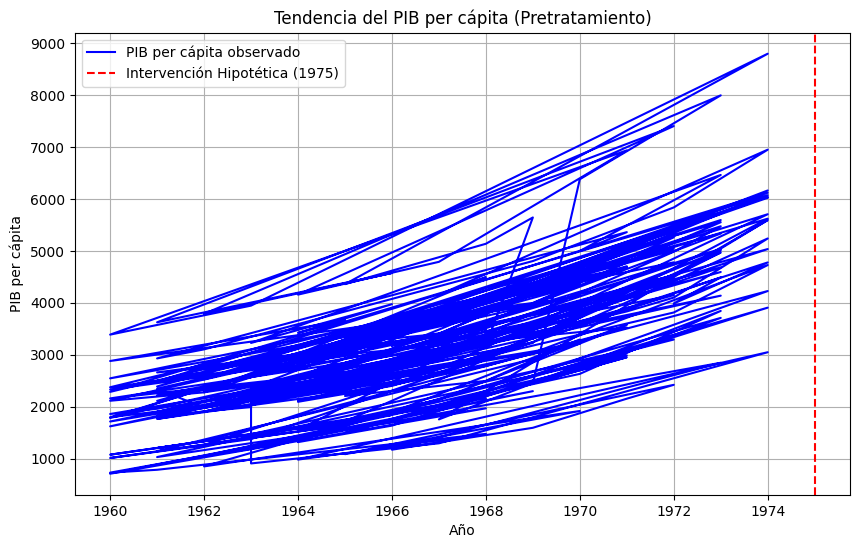

In [11]:
import matplotlib.pyplot as plt

# Graficar la tendencia del PIB per cápita
plt.figure(figsize=(10, 6))
plt.plot(datos_pretratamiento['year'], y, label='PIB per cápita observado', color='b')

# Añadir la línea de intervención en 1975
plt.axvline(x=1975, color='red', linestyle='--', label='Intervención Hipotética (1975)')

plt.xlabel('Año')
plt.ylabel('PIB per cápita')
plt.title('Tendencia del PIB per cápita (Pretratamiento)')
plt.legend()
plt.grid(True)
plt.show()

#### Conclusión

A través de la implementación del **modelo de Diferencias en Diferencias** (DiD) con **efectos fijos** y utilizando una **nueva hipótesis sobre el año de la reunificación (1975)**, podemos comparar las **discrepancias** en los resultados con el análisis original (donde el año de intervención fue 1990). Si las discrepancias son grandes, esto indicaría que los resultados originales son **sensibles** a la hipótesis del año de intervención, lo que comprometería la robustez de los hallazgos iniciales.

Este tipo de análisis permite **validar** o **cuestionar** la **solidez** de los resultados, y es fundamental para asegurar que los hallazgos no dependan de una **hipótesis específica** sobre el año de la reunificación.

### **Pregunta 6:** Evaluar influencia desproporcionada en el Donor Pool

**Objetivo:** Analizar si algún país del Donor Pool ejerce una influencia desproporcionada en la construcción del estimado sintético utilizando el análisis Leave-One-Out (LOO).



El **Donor Pool** es el conjunto de países que no son el objetivo de la intervención (en este caso, Alemania Occidental antes de 1990). El objetivo es identificar qué países del **Donor Pool** tienen un impacto significativo o desproporcionado en la estimación de la tendencia del PIB de Alemania Occidental.

Podemos aproximar la influencia de cada país mediante el análisis de regresión. Si tenemos los datos de los países del Donor Pool, podemos realizar una **regresión ponderada**, donde los pesos se ajustan en función de la proximidad del comportamiento económico de los países del Donor Pool al de Alemania Occidental.

Una vez que tengamos los pesos estimados para cada país del Donor Pool, podemos **comprobar si algún país tiene un peso muy alto**. Esto indicaría que su influencia podría ser desproporcionada. Un gráfico de barras o un gráfico de dispersión podría ser útil para visualizar los pesos.

Usaremos un gráfico de barras para mostrar los pesos de cada país del Donor Pool y evaluar si algún país tiene un peso significativo.

In [12]:
# Filtrar los datos de los países del Donor Pool (todos los países excepto Alemania Occidental)
donor_pool_data = datos_pretratamiento[datos_pretratamiento['country'] != 'West Germany']

In [13]:
from sklearn.linear_model import LinearRegression

# Estimar los pesos mediante regresión simple
reg = LinearRegression()

# Creamos una lista para almacenar los pesos de cada país
weights = {}

for country in donor_pool_data['country'].unique():
    # Filtramos los datos para cada país del Donor Pool
    country_data = donor_pool_data[donor_pool_data['country'] == country]

    # Realizamos la regresión para cada país comparando con Alemania Occidental
    # Ajustamos el modelo de regresión
    X_country = country_data[['year']].values  # Año como variable independiente
    y_country = country_data['gdp'].values     # PIB como variable dependiente

    # Ajustar la regresión
    reg.fit(X_country, y_country)

    # Guardamos el coeficiente que representa la "influencia" de este país
    weights[country] = reg.coef_[0]

# Convertimos los pesos en un DataFrame para facilidad de análisis
weights_df = pd.DataFrame(list(weights.items()), columns=['country', 'weight'])

In [14]:
# Analizar si algún país tiene un peso desproporcionado
threshold = weights_df['weight'].mean() + 2 * weights_df['weight'].std()  # Umbral de robustez

# Filtramos los países cuyo peso excede el umbral
outlier_countries = weights_df[weights_df['weight'] > threshold]
print("Países con influencia desproporcionada:")
print(outlier_countries)

Países con influencia desproporcionada:
        country      weight
13  Switzerland  371.400055


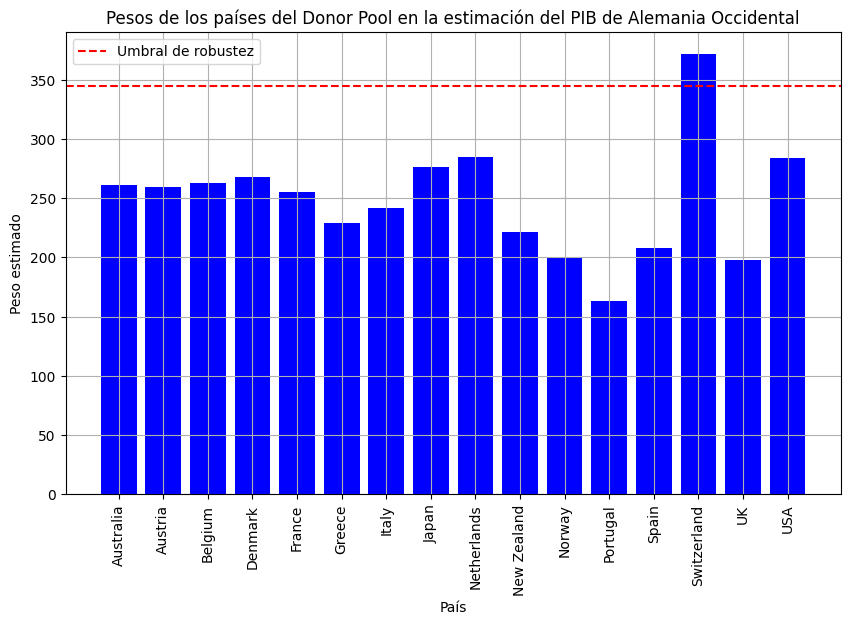

In [15]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras para visualizar los pesos de cada país
plt.figure(figsize=(10, 6))
plt.bar(weights_df['country'], weights_df['weight'], color='blue')
plt.axhline(y=threshold, color='red', linestyle='--', label='Umbral de robustez')
plt.xticks(rotation=90)
plt.xlabel('País')
plt.ylabel('Peso estimado')
plt.title('Pesos de los países del Donor Pool en la estimación del PIB de Alemania Occidental')
plt.legend()
plt.grid(True)
plt.show()

#### Descripción del gráfico:
- **Eje X**: Representa los países del *Donor Pool* (conjunto de países donantes) que están siendo evaluados para la estimación del PIB de Alemania Occidental.
- **Eje Y**: Muestra los "Pesos estimados" que cada país del *Donor Pool* tiene en la estimación del PIB de Alemania Occidental. Estos pesos reflejan la influencia que cada país tiene en la construcción de dicho estimado.
- **Barra roja discontinua**: Representa el "Umbral de robustez", que señala un valor crítico para evaluar qué tan influyente es cada país en la estimación.

#### Interpretación del gráfico:
- **Pesos estimados de los países**: Los países en el gráfico están clasificados por el peso que tienen en la estimación del PIB de Alemania Occidental. En el gráfico, la mayoría de los países tienen pesos similares, con un grupo de países que se destacan con pesos notablemente más altos que otros.
- **Umbral de robustez**: Este umbral actúa como un valor de referencia. Los países que tienen un peso mayor al umbral de robustez ejercen una mayor influencia sobre la estimación y podrían ser considerados como países con influencia desproporcionada en el modelo. Esto se debe a que su peso en la estimación supera un valor crítico que ha sido determinado como parte del análisis de robustez.

#### Análisis en relación con la pregunta 6:
- **¿Hay algún país con influencia desproporcionada?**
  Sí, en el gráfico se puede observar que **Suiza** tiene un peso considerablemente más alto que el resto de los países. Su peso estimado supera ampliamente el umbral de robustez (línea roja discontinua), lo que indica que Suiza podría estar ejerciendo una influencia desproporcionada en la construcción de la estimación del PIB de Alemania Occidental.
  
- **Chequeo de robustez**:
  El gráfico muestra visualmente los países que están por encima y por debajo del umbral de robustez. Aquellos que tienen un peso significativamente por encima de este umbral (como Suiza) deben ser evaluados con más detalle. Si se eliminara dicho país, la estimación del PIB podría cambiar significativamente, lo que indicaría que ese país tiene una influencia desproporcionada.

- **Conclusión**:
  El gráfico sugiere que países como Suiza, con un peso considerablemente más alto, podrían estar sesgando la estimación del PIB de Alemania Occidental. Un análisis más profundo debería centrarse en la posible sensibilidad de la estimación a la eliminación de dichos países, ya que su influencia podría distorsionar los resultados si no se controla adecuadamente.

Este gráfico es útil para realizar un análisis de robustez, ya que muestra de manera clara qué países están contribuyendo más a la estimación y si alguno de ellos debería ser revisado o excluido por su influencia excesiva.

### **Pregunta 7:** ¿Es el resultado principal obtenido estadísticamente significativo? Realice un test de permutaciones, y excluya secuencialmente Estados cuyos RMSPEs son mayores al de West Germany. ¿Qué se concluye usando este método de inferencia?

### **Pregunta 8:** Calcule el p-value exacto del tratamiento. ¿Los resultados corroboran lo hallado por el metodo de permutaciones?

### **Pregunta 9:** ¿Cómo solventaría la plausible inestabilidad del método estimación nested en los reusltados? Rejecute el método bajo su propuesta y vuelva a evaluar la significancia estadística